In [579]:
using CSV, DataFrames
using PyPlot, LaTeXStrings, PyCall, Statistics
@pyimport numpy as np
@pyimport scienceplots

In [580]:
# データの読み込み
obs = CSV.read("./observation/obs_20deg_EF.csv", DataFrame)
obs2 = CSV.read("./observation/obs_20deg_EF2.csv", DataFrame)


start_num = 1
end_num = 50
number = end_num - start_num + 1

duration = 30
dt = 0.2
sampling = Int(duration / dt)
whole_step = sampling

time_list = range(0.00, stop=duration,  step=dt)

# グラフスタイルの設定
plt.style.use(["science", "ieee"])

data1 = []
for q in start_num:end_num   
    push!(data1, CSV.read("./results/L3MPC_10,20deg/MPC_20deg_result$(q).csv", DataFrame))
end

In [581]:
x_F = zeros(Float64, sampling, 4)
for i in 2:sampling
    for q in 1:number
        x_F[i,1] = mean([df[i, :X_F] for df in data1[1:number]])
        x_F[i,2] = median([df[i, :X_F] for df in data1[1:number]])
        x_F[i,3] = mean([df[i, :X_F]*cos(df[i-1, :ψ]) - df[i, :Y_F]*sin(df[i-1, :ψ]) for df in data1[1:number]])
        x_F[i,4] = median([df[i, :X_F]*cos(df[i-1, :ψ]) - df[i, :Y_F]*sin(df[i-1, :ψ]) for df in data1[1:number]])
    end
end

y_F = zeros(Float64, sampling, 4)
for i in 2:sampling
    for q in 1:number
        y_F[i,1] = mean([df[i, :Y_F] for df in data1[1:number]])
        y_F[i,2] = median([df[i, :Y_F] for df in data1[1:number]])
        y_F[i,3] = mean([df[i, :X_F]*sin(df[i-1, :ψ]) + df[i, :Y_F]*cos(df[i-1, :ψ]) for df in data1[1:number]])
        y_F[i,4] = median([df[i, :X_F]*sin(df[i-1, :ψ]) + df[i, :Y_F]*cos(df[i-1, :ψ]) for df in data1[1:number]])
    end
end

n_F = zeros(sampling, 4)
for i in 2:sampling
    for q in 1:number
        n_F[i,1] = mean([df[i, :N_F] for df in data1[1:number]])
        n_F[i,2] = median([df[i, :N_F] for df in data1[1:number]])
        n_F[i,3] = mean(df[i, :N_F] for df in data1[1:number])
        n_F[i,4] = median(df[i, :N_F] for df in data1[1:number])
    end
end

cols = Int(duration/dt) + 1
df = DataFrame(
    time = collect(0:dt:duration),
    x_F_body_mean=zeros(cols),
    x_F_body_median=zeros(cols),
    y_F_body_mean=zeros(cols),
    y_F_body_median=zeros(cols),
    n_F_body_mean=zeros(cols),
    n_F_body_median=zeros(cols),
    x_F_earth_mean=zeros(cols),
    x_F_earth_median=zeros(cols),
    y_F_earth_mean=zeros(cols),
    y_F_earth_median=zeros(cols),
    n_F_earth_mean=zeros(cols),
    n_F_earth_median=zeros(cols)
)
for i in 2:Int(duration/dt)
    df[i,2:13] = [x_F[i,1], x_F[i,2], y_F[i,1], y_F[i,2], n_F[i,1], n_F[i,2], x_F[i,3], x_F[i,4], y_F[i,3], y_F[i,4], n_F[i,3], n_F[i,4]]
end
CSV.write("EF20L3.csv", df)

"EF20L3.csv"

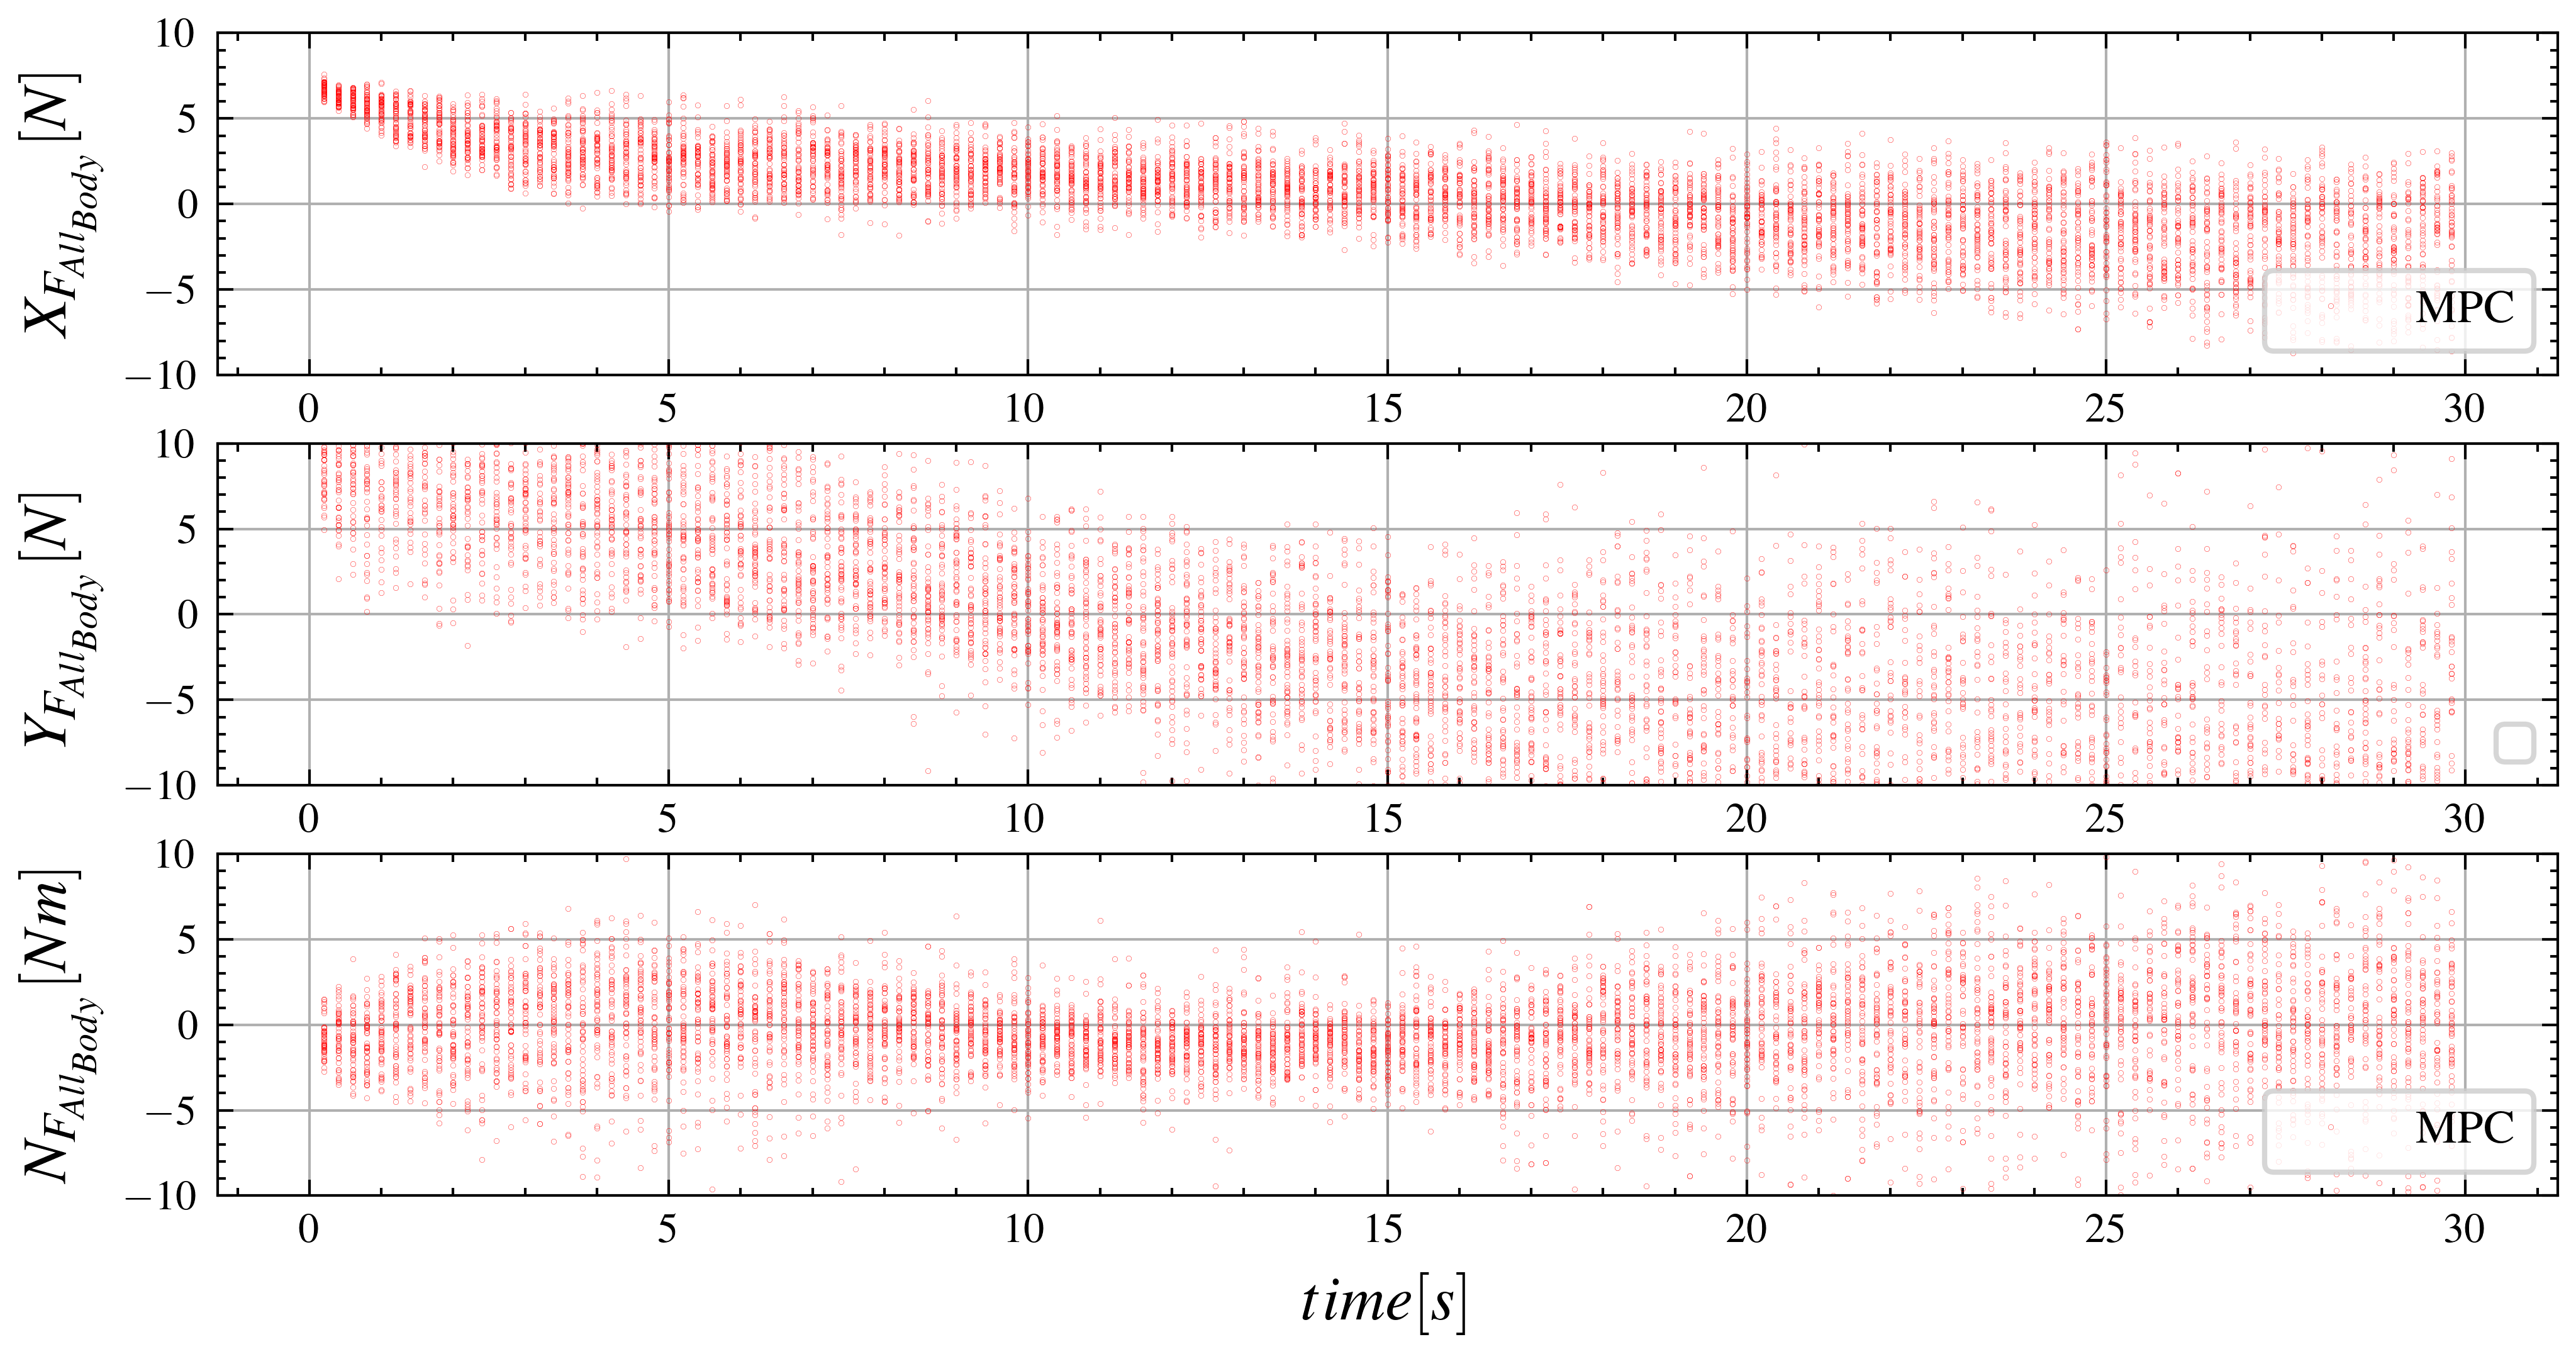

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [582]:
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(3, 1, 1)
for q in 1:number
    ax1.plot(data1[q][2:sampling,"time"], data1[q][2:sampling,"X_F"], ".", color="r", markersize=0.1) 
end
# ax1.plot(obs[2:sampling,"time"], obs[2:sampling,"X_F"].+obs[2:sampling,"X_wind"], "-", label="Target", c="k", alpha=1.0, linewidth=1)
# ax1.plot(obs[2:sampling,"time"], x_F[2:sampling,1], "-", label="MPC", c="b", alpha=1.0, linewidth=1)
ax1.plot(data1[1][2:sampling,"time"], data1[1][2:sampling,"X_F"], ".", color="r", markersize=0.1, label="MPC") 
ax1.set_ylabel(L"X_{F_{All_{Body}}}[N]", fontsize=12)
ax1.set_ylim(-10, 10)
ax1.grid()
ax1.legend(frameon=true, loc="lower right", fontsize=9)

ax2 = fig.add_subplot(3, 1, 2)
for q in 1:number
    ax2.plot(data1[q][2:sampling,"time"], data1[q][2:sampling,"Y_F"], ".", color="r", markersize=0.1)
end
# ax2.plot(obs[2:sampling,"time"], obs[2:sampling,"Y_F"].+obs[2:sampling,"Y_wind"], "-", label="Target", c="k", alpha=1, linewidth=1)
# ax2.plot(obs[2:sampling,"time"], y_F[2:sampling,1], "-", label="MPC", c="b", alpha=1.0, linewidth=1)
ax2.set_ylabel(L"Y_{F_{All_{Body}}}[N]", fontsize=12)
ax2.set_ylim(-10, 10)
ax2.grid()
ax2.legend(frameon=true, loc="lower right", fontsize=9)

ax3 = fig.add_subplot(3, 1, 3)
for q in 1:number
    ax3.plot(data1[q][2:sampling,"time"], data1[q][2:sampling,"N_F"], ".", color="r", markersize=0.1)
end
# ax3.plot(obs[2:sampling,"time"], obs[2:sampling,"N_F"].+obs[2:sampling,"N_wind"], "-", label="Target", c="k", alpha=1, linewidth=1)
# ax3.plot(obs[2:sampling,"time"], n_F[2:sampling,1], "-", label="MPC", c="b", alpha=1.0, linewidth=1)
ax3.plot(data1[1][2:sampling,"time"], data1[1][2:sampling,"N_F"], ".", color="r", markersize=0.1, label="MPC")
ax3.set_ylabel(L"N_{F_{All_{Body}}}[Nm]", fontsize=12)
ax3.set_ylim(-10, 10)
ax3.grid()
ax3.legend(frameon=true, loc="lower right", fontsize=9)
ax3.set_xlabel(L"time[s]", fontsize=12)
display(fig)

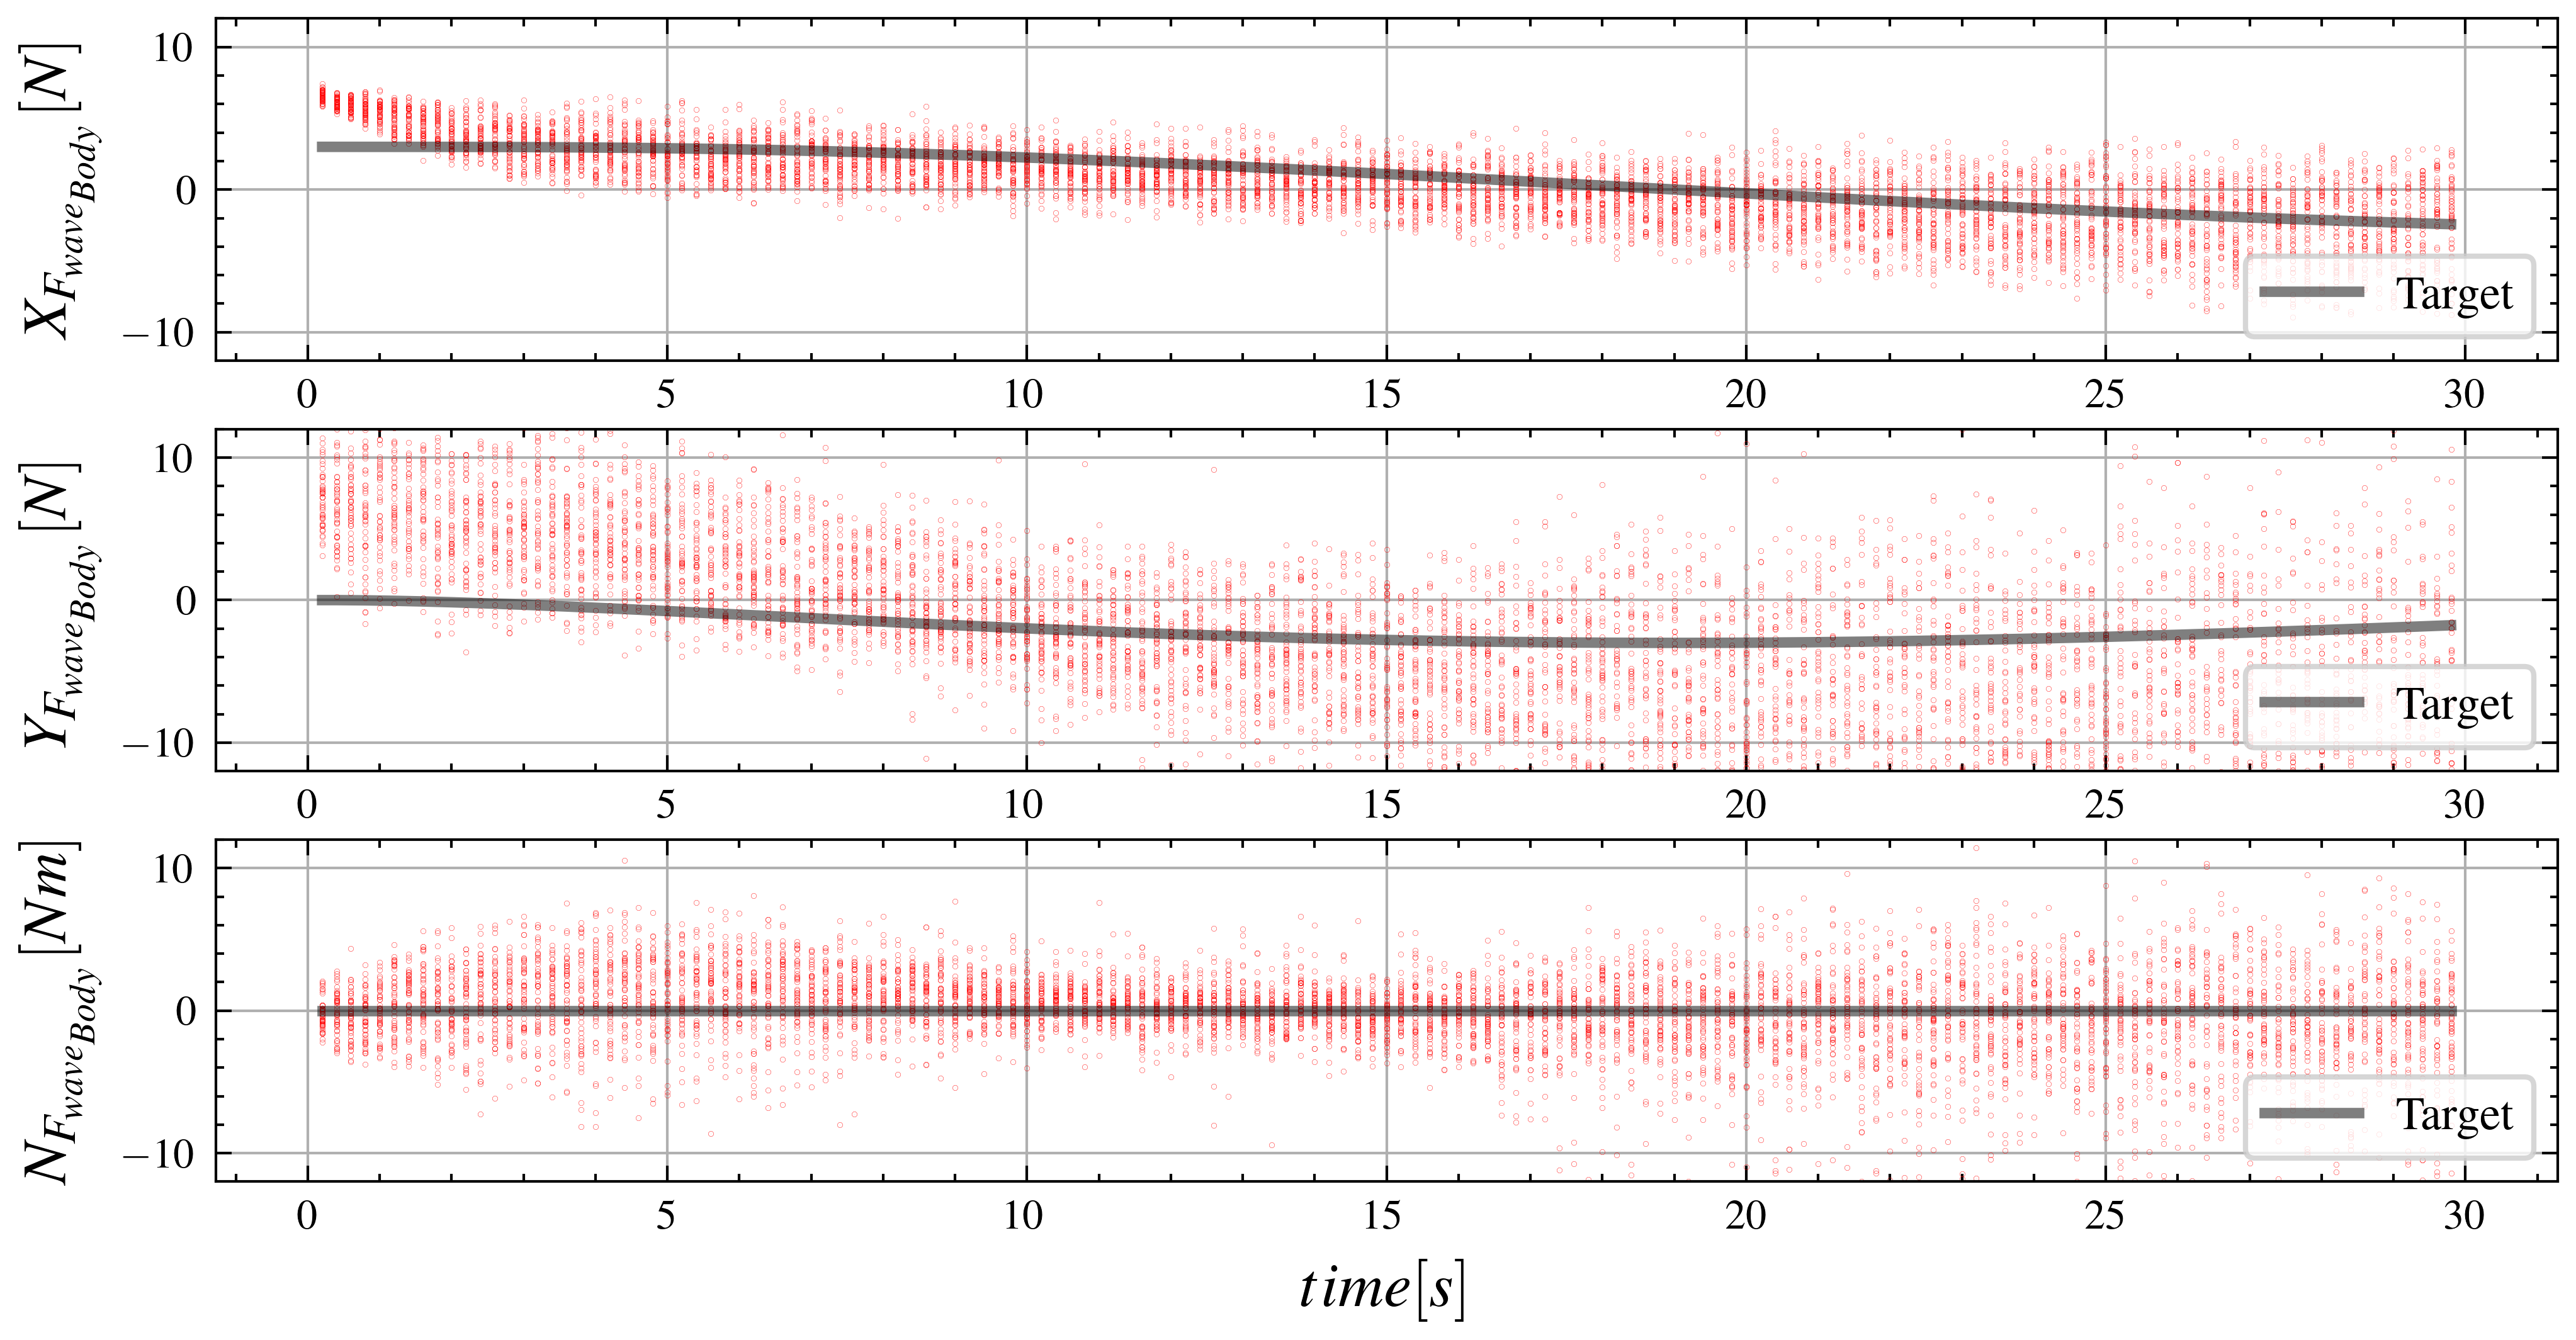

In [583]:
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(3, 1, 1)
for q in 1:number
    ax1.plot(data1[q][2:sampling,"time"], data1[q][2:sampling,"X_F"]-obs2[2:sampling,"X_wind"], ".", color="r", markersize=0.1) 
end
ax1.plot(obs[2:sampling,"time"], obs[2:sampling,"X_F"], "-", label="Target", c="k", alpha=0.5, linewidth=2)
# ax1.plot(obs[2:sampling,"time"], x_F[2:sampling,1]-obs2[2:sampling,"X_wind"], ".", label="mean", c="b", alpha=1.0, markersize=1.5)
# ax1.plot(obs[2:sampling,"time"], x_F[2:sampling,2]-obs2[2:sampling,"X_wind"], ".", label="median", c="g", alpha=1.0, markersize=1.5)
ax1.set_ylabel(L"X_{F_{wave_{Body}}}[N]", fontsize=12)
ax1.set_ylim(-12, 12)
ax1.grid()
ax1.legend(frameon=true, loc="lower right", fontsize=9)

ax2 = fig.add_subplot(3, 1, 2)
for q in 1:number
    ax2.plot(data1[q][2:sampling,"time"], data1[q][2:sampling,"Y_F"]-obs2[2:sampling,"Y_wind"], ".", color="r", markersize=0.1)
end
ax2.plot(obs[2:sampling,"time"], obs[2:sampling,"Y_F"], "-", label="Target", c="k", alpha=0.5, linewidth=2)
# ax2.plot(obs[2:sampling,"time"], y_F[2:sampling,1]-obs2[2:sampling,"Y_wind"], ".", label="mean", c="b", alpha=1.0, markersize=1.5)
# ax2.plot(obs[2:sampling,"time"], y_F[2:sampling,2]-obs2[2:sampling,"Y_wind"], ".", label="median", c="g", alpha=1.0, markersize=1.5)
ax2.set_ylabel(L"Y_{F_{wave_{Body}}}[N]", fontsize=12)
ax2.set_ylim(-12, 12)
ax2.grid()
ax2.legend(frameon=true, loc="lower right", fontsize=9)

ax3 = fig.add_subplot(3, 1, 3)
for q in 1:number
    ax3.plot(data1[q][2:sampling,"time"], data1[q][2:sampling,"N_F"]-obs2[2:sampling,"N_wind"], ".", color="r", markersize=0.1)
end
ax3.plot(obs[2:sampling,"time"], obs[2:sampling,"N_F"], "-", label="Target", c="k", alpha=0.5, linewidth=2)
# ax3.plot(obs[2:sampling,"time"], n_F[2:sampling,1]-obs2[2:sampling,"N_wind"], ".", label="mean", c="b", alpha=1.0, markersize=1.5)
# ax3.plot(obs[2:sampling,"time"], n_F[2:sampling,2]-obs2[2:sampling,"N_wind"], ".", label="median", c="g", alpha=1.0, markersize=1.5)
ax3.set_ylabel(L"N_{F_{wave_{Body}}}[Nm]", fontsize=12)
ax3.set_ylim(-12, 12)
ax3.grid()
ax3.legend(frameon=true, loc="lower right", fontsize=9)
ax3.set_xlabel(L"time[s]", fontsize=12)
display(fig)

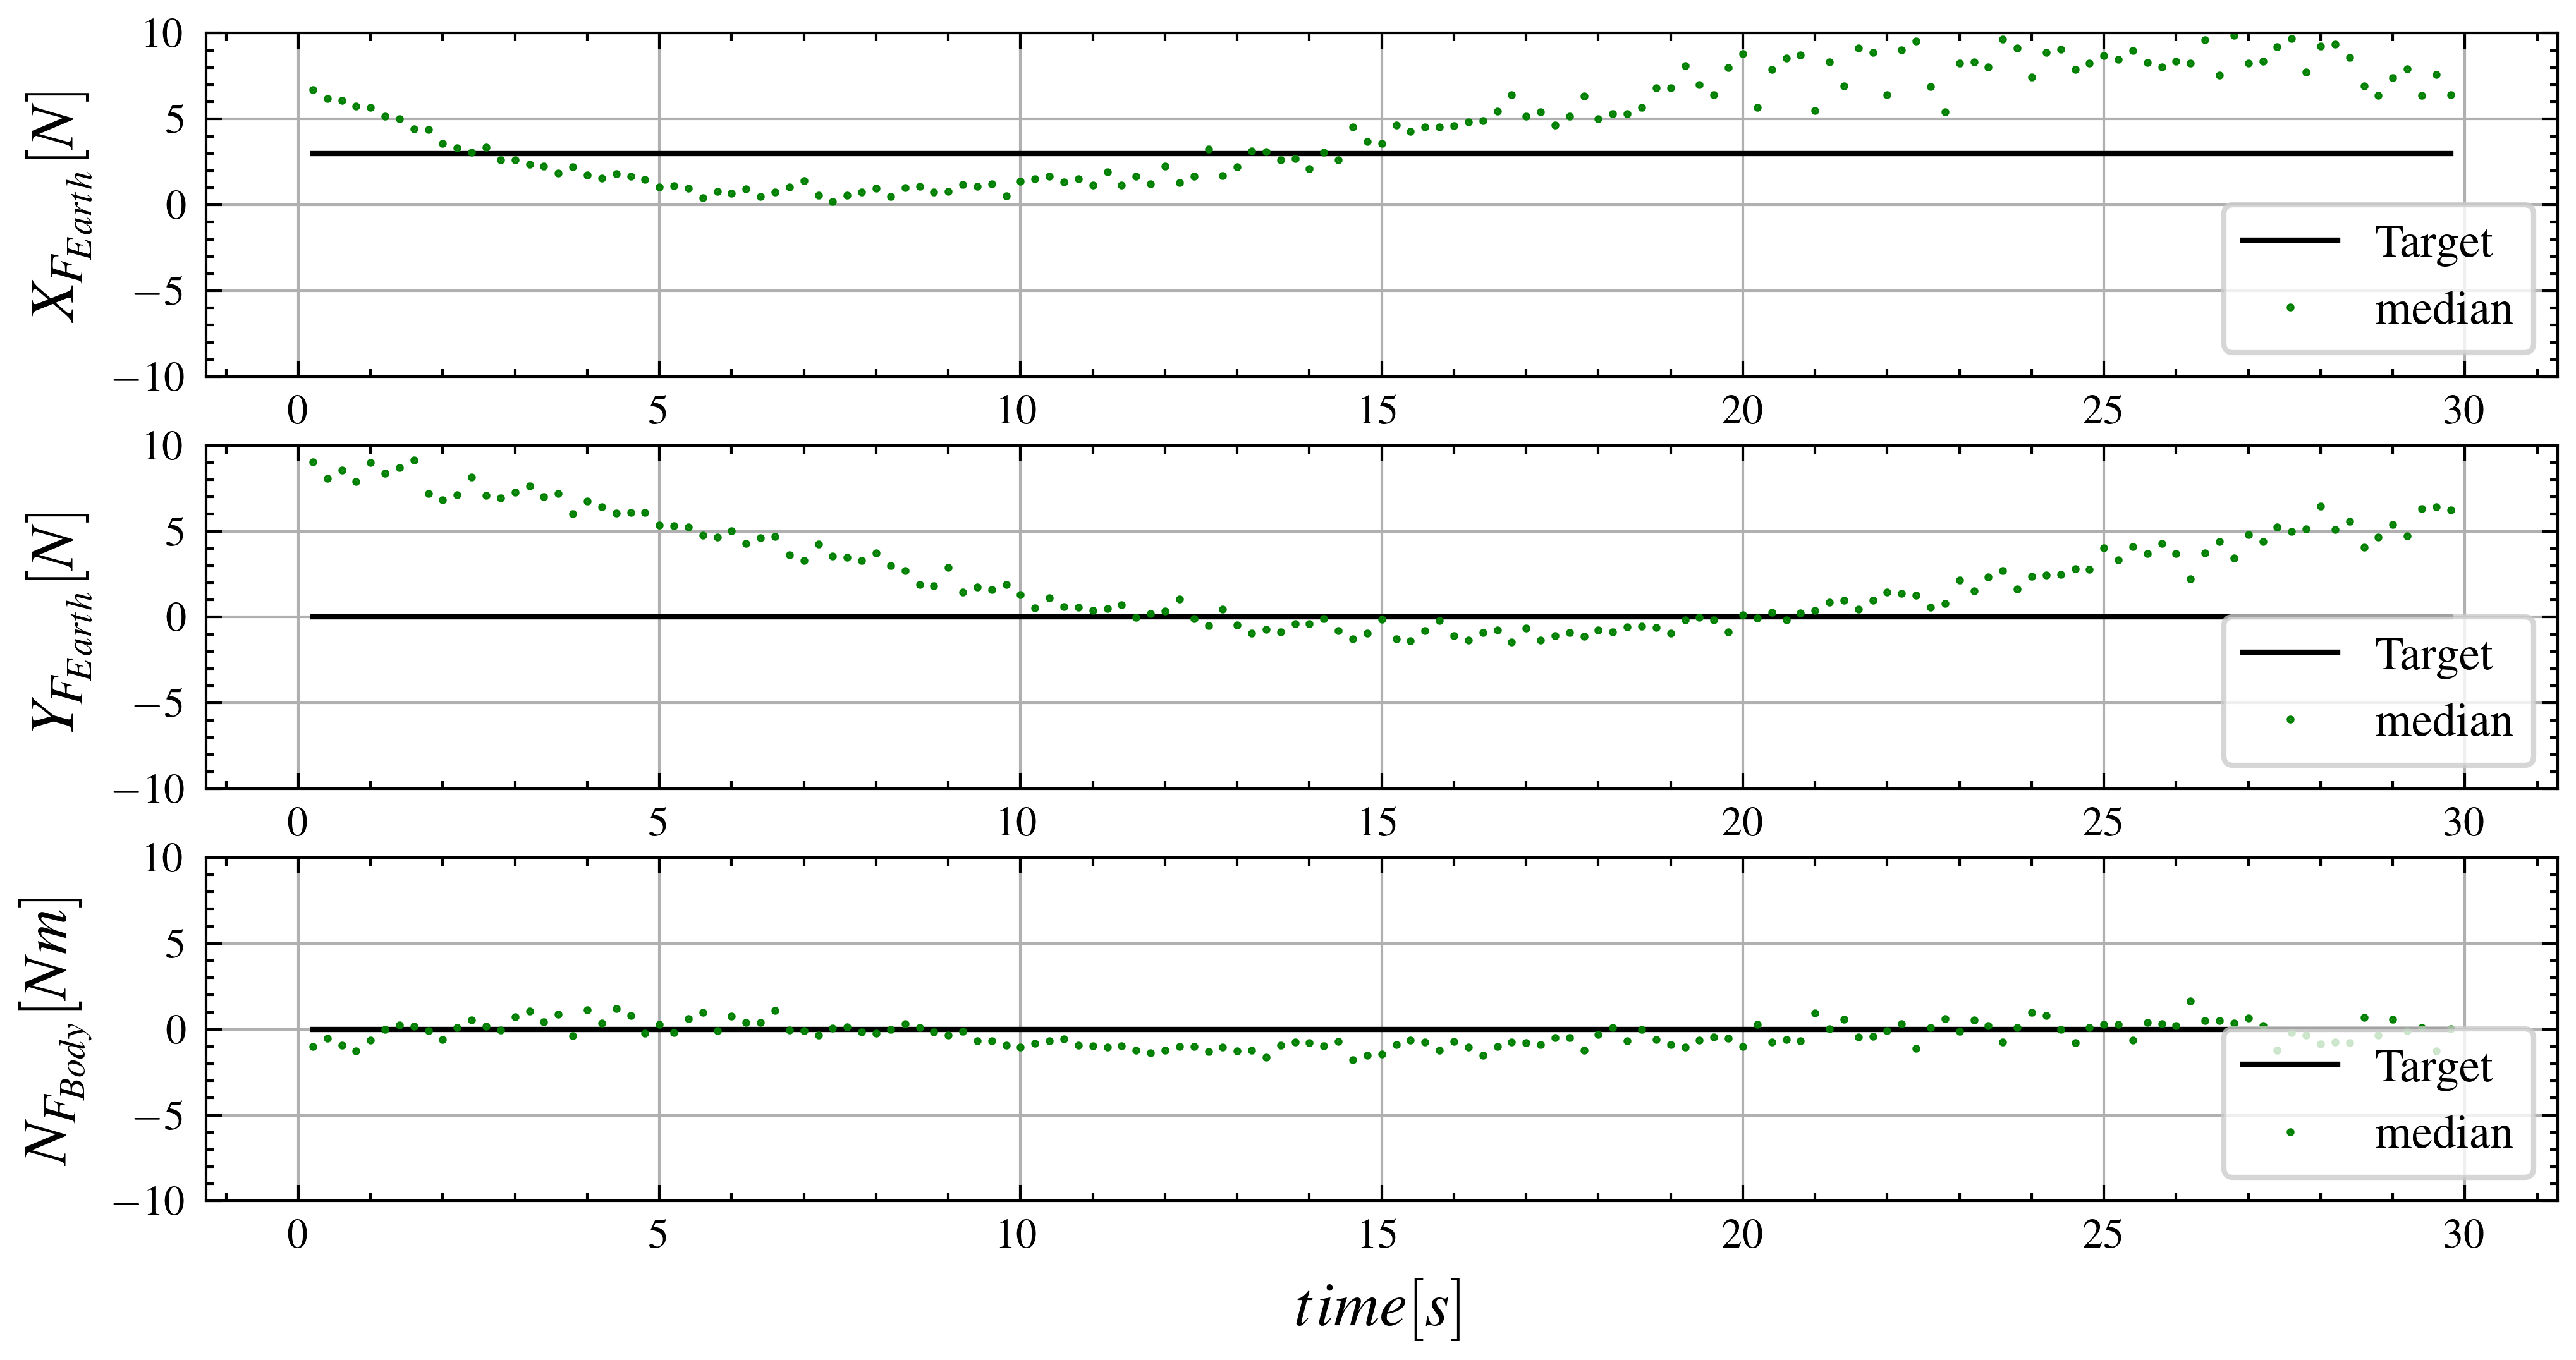

In [584]:
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(3, 1, 1)
# for q in 1:number
#     ax1.plot(data1[q][2:sampling,"time"], (data1[q][2:sampling,"X_F"].-obs2[2:sampling,"X_wind"]).*cos.(data1[q][1:sampling-1,"ψ"]) .- (data1[q][2:sampling,"Y_F"].-obs2[2:sampling,"Y_wind"]).*sin.(data1[q][1:sampling-1,"ψ"]), ".", color="r", markersize=0.1,alpha=0.5) 
# end
ax1.plot(obs[2:sampling,"time"], obs[2:sampling,"X_F"].*cos.(obs[1:sampling-1,"ψ"]).-obs[2:sampling,"Y_F"].*sin.(obs[1:sampling-1,"ψ"]), "-", label="Target", c="k", alpha=1.0, linewidth=1)
# ax1.plot(obs[2:sampling,"time"], x_F[2:sampling,3], "v", label="average", c="b", markersize=1, alpha = 1)
ax1.plot(obs[2:sampling,"time"], x_F[2:sampling,4], ".", label="median", c="g", markersize=1, alpha = 1)
ax1.set_ylabel(L"X_{F_{Earth}}[N]", fontsize=12)
ax1.set_ylim(-10, 10)
ax1.grid()
ax1.legend(frameon=true, loc="lower right", fontsize=9)

ax2 = fig.add_subplot(3, 1, 2)
# for q in 1:number
#     ax2.plot(data1[q][2:sampling,"time"], (data1[q][2:sampling,"X_F"].-obs2[2:sampling,"X_wind"]).*sin.(data1[q][1:sampling-1,"ψ"]) .+ (data1[q][2:sampling,"Y_F"].-obs2[2:sampling,"Y_wind"]).*cos.(data1[q][1:sampling-1,"ψ"]), ".", color="r", markersize=0.1,alpha=0.5)
# end
ax2.plot(obs[2:sampling,"time"], obs[2:sampling,"X_F"].*sin.(obs[1:sampling-1,"ψ"]).+obs[2:sampling,"Y_F"].*cos.(obs[1:sampling-1,"ψ"]), "-", label="Target", c="k", alpha=1, linewidth=1)
# ax2.plot(obs[2:sampling,"time"], y_F[2:sampling,3], ".", label="MPC", c="b", markersize=0.5, alpha = 0.6)
ax2.plot(obs[2:sampling,"time"], y_F[2:sampling,4], ".", label="median", c="g", markersize=1, alpha = 1)
ax2.set_ylabel(L"Y_{F_{Earth}}[N]", fontsize=12)
ax2.set_ylim(-10, 10)
ax2.grid()
ax2.legend(frameon=true, loc="lower right", fontsize=9)

ax3 = fig.add_subplot(3, 1, 3)
# for q in 1:number
#     ax3.plot(data1[q][2:sampling,"time"], data1[q][2:sampling,"N_F"]-obs2[2:sampling,"N_wind"], ".", color="r", markersize=0.1,alpha=0.5)
# end
ax3.plot(obs[2:sampling,"time"], obs[2:sampling,"N_F"], "-", label="Target", c="k", alpha=1, linewidth=1)
# ax3.plot(obs[2:sampling,"time"], n_F[2:sampling,3], ".", label="MPC", c="b", markersize=0.5, alpha = 0.6)
ax3.plot(obs[2:sampling,"time"], n_F[2:sampling,4], ".", label="median", c="g", markersize=1, alpha = 1)
ax3.set_ylabel(L"N_{F_{Body}}[Nm]", fontsize=12)
ax3.set_ylim(-10, 10)
ax3.grid()
ax3.legend(frameon=true, loc="lower right", fontsize=9)
ax3.set_xlabel(L"time[s]", fontsize=12)
display(fig)


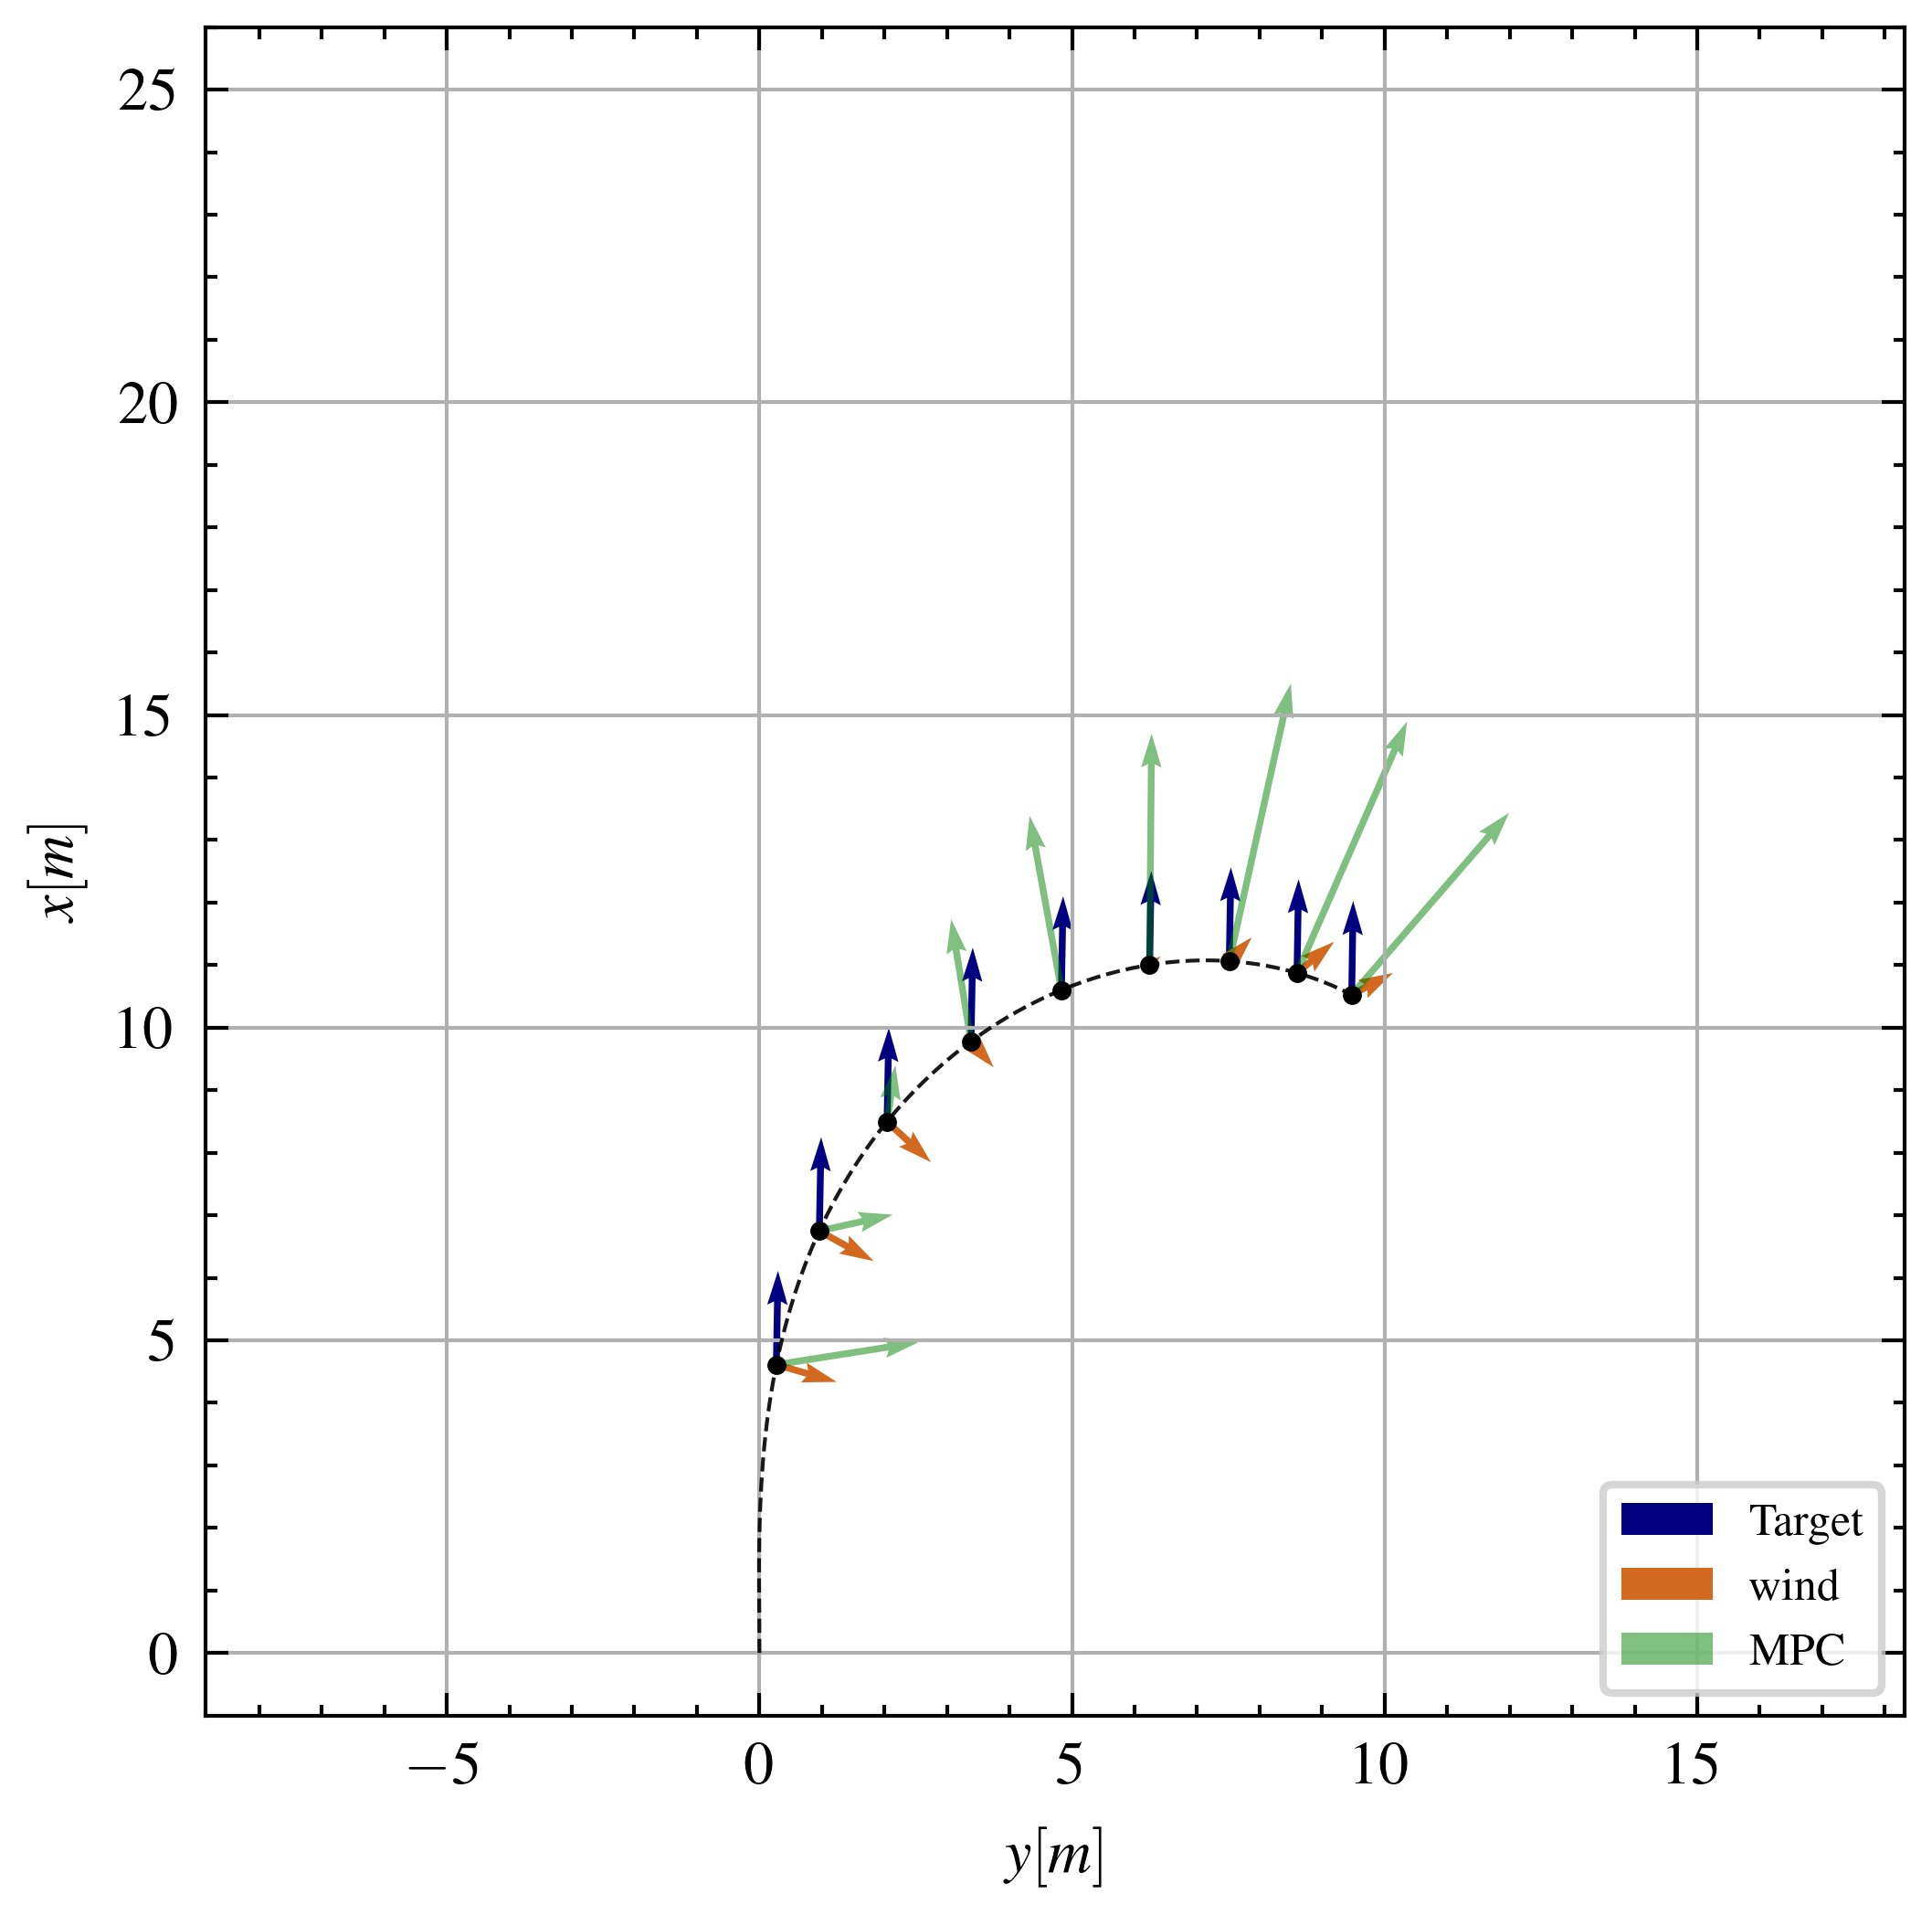

In [585]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1, 1, 1)
skip = 15
scale = 2
width = 0.004
alpha = 1
start = 30
whole_step = Int(30/0.2)
# ax.quiver(obs[start:skip:whole_step,"y"], obs[start:skip:whole_step,"x"], obs[start:skip:whole_step,"Y_wind"].*cos.(obs[start:skip:whole_step,"ψ"]).+obs[start:skip:whole_step,"X_wind"].*sin.(obs[start:skip:whole_step,"ψ"]), .-obs[start:skip:whole_step,"Y_wind"].*sin.(obs[start:skip:whole_step,"ψ"])+obs[start:skip:whole_step,"X_wind"].*cos.(obs[start:skip:whole_step,"ψ"]), angles="xy", scale_units="xy" ,scale=scale, width=width,color="sienna", alpha=alpha)
ax.quiver(obs[start:skip:whole_step,"y"], obs[start:skip:whole_step,"x"], obs[start:skip:whole_step,"Y_F"].*cos.(obs[start:skip:whole_step,"ψ"]).+obs[start:skip:whole_step,"X_F"].*sin.(obs[start:skip:whole_step,"ψ"]), .-obs[start:skip:whole_step,"Y_F"].*sin.(obs[start:skip:whole_step,"ψ"])+obs[start:skip:whole_step,"X_F"].*cos.(obs[start:skip:whole_step,"ψ"]), angles="xy", scale_units="xy" ,scale=scale, width=width,color="navy", alpha=alpha, label="Target")
ax.quiver(obs[start:skip:whole_step,"y"], obs[start:skip:whole_step,"x"], obs2[start:skip:whole_step,"Y_wind"].*cos.(obs[start:skip:whole_step,"ψ"]).+obs2[start:skip:whole_step,"X_wind"].*sin.(obs[start:skip:whole_step,"ψ"]), .-obs2[start:skip:whole_step,"Y_wind"].*sin.(obs[start:skip:whole_step,"ψ"])+obs2[start:skip:whole_step,"X_wind"].*cos.(obs[start:skip:whole_step,"ψ"]), angles="xy", scale_units="xy" ,scale=scale, width=width,color="chocolate", alpha=alpha, label="wind")
ax.quiver(obs[start:skip:whole_step,"y"], obs[start:skip:whole_step,"x"], y_F[start:skip:whole_step,1].*cos.(obs[start:skip:whole_step,"ψ"]).+x_F[start:skip:whole_step,1].*sin.(obs[start:skip:whole_step,"ψ"]), .-y_F[start:skip:whole_step,1].*sin.(obs[start:skip:whole_step,"ψ"])+x_F[start:skip:whole_step,1].*cos.(obs[start:skip:whole_step,"ψ"]), angles="xy", scale_units="xy" ,scale=scale, width=width,color="green", alpha=0.5, label="MPC")
ax.plot(obs[1:whole_step,"y"], obs[1:whole_step,"x"], "--", c="k", alpha=0.9, linewidth=0.5)
ax.plot(obs[start:skip:whole_step,"y"], obs[start:skip:whole_step,"x"], ".", c="k", markersize=3)
ax.set_ylabel(L"x[m]", fontsize=8)
ax.set_xlabel(L"y[m]", fontsize=8)
ax.legend(frameon=true, loc="lower right", fontsize=6)
ax.axis("equal")
ax.set_ylim(-1,26)
ax.grid()
display(fig)

In [608]:
EF1=CSV.read("./EF15L3.csv", DataFrame)
EF2=CSV.read("./EF10L3.csv", DataFrame)
e = start:skip:sampling
N = zeros(Float64, length(e))
deg = zeros(Float64, length(e))
for (j, i) in enumerate(e)  # e の各要素とその順序インデックスを取得
    N[j] = sqrt(EF1[i, "x_F_earth_median"]^2 + EF1[i, "y_F_earth_median"]^2) - 3.0
    deg[j] = atan(EF1[i, "y_F_earth_median"], EF1[i, "x_F_earth_median"])/pi*180
end
println(N)
println(deg)

[0.6111027594062697, 0.8009328550207502, 2.534550584307663, 4.368674849672693, 4.609116678964042, 2.349063383913691, -0.6734831115318745, -1.1180970820898222, 0.6620332695446791]
[24.408976657621732, 20.424337252874043, 45.92955588636473, 59.82788203282552, 69.99316717233884, 75.40207992260571, 69.16158280396183, -5.835968808011718, -10.599598237420382]
